# ENGS93: Statistical Methods in Engineering:
## <span class="mark">HOMEWORK 7 <span class="mark">SOLUTIONS</span></span>

### Question 1: First load code from RX4 and created the ddt.lm regression object 

In [1]:
fish <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fish.txt", header = TRUE, sep = "\t", dec = ".")
summary(fish)
attach(fish)
LN.DDT=log(DDT)
ddt.lm=lm(LN.DDT~LENGTH)

    RIVER                MILE         SPECIES              LENGTH     
 Length:144         Min.   :  1.0   Length:144         Min.   :17.50  
 Class :character   1st Qu.:283.8   Class :character   1st Qu.:40.50  
 Mode  :character   Median :300.0   Mode  :character   Median :45.00  
                    Mean   :268.6                      Mean   :42.81  
                    3rd Qu.:320.0                      3rd Qu.:47.50  
                    Max.   :345.0                      Max.   :52.00  
     WEIGHT            DDT          
 Min.   : 173.0   Min.   :   0.110  
 1st Qu.: 805.5   1st Qu.:   3.375  
 Median :1000.0   Median :   7.150  
 Mean   :1049.7   Mean   :  24.355  
 3rd Qu.:1257.8   3rd Qu.:  13.000  
 Max.   :2302.0   Max.   :1100.000  

### Question 1 part a)

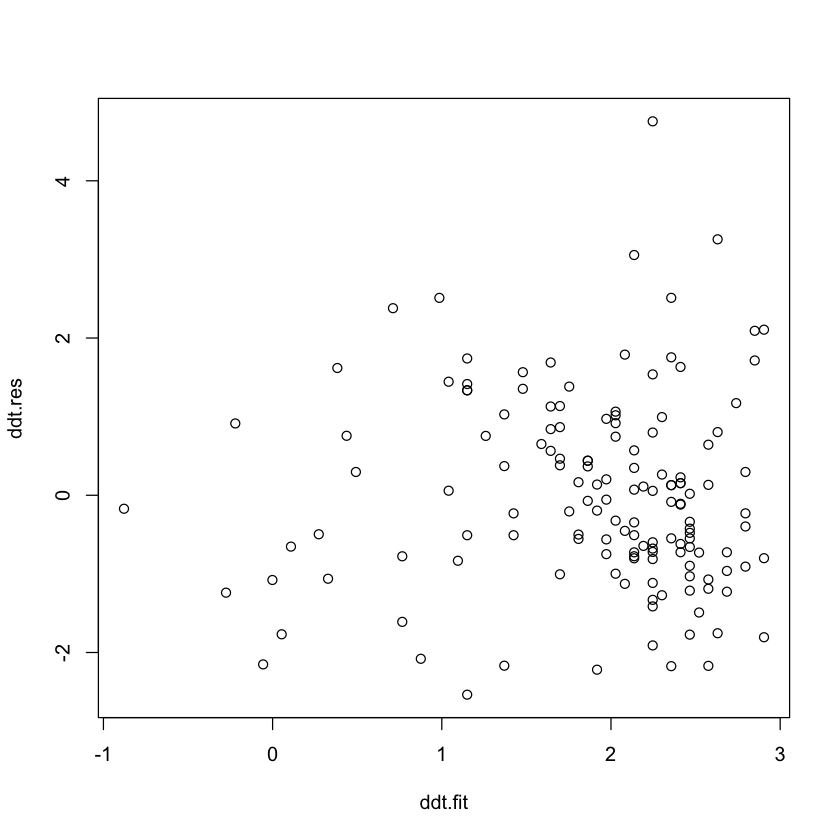

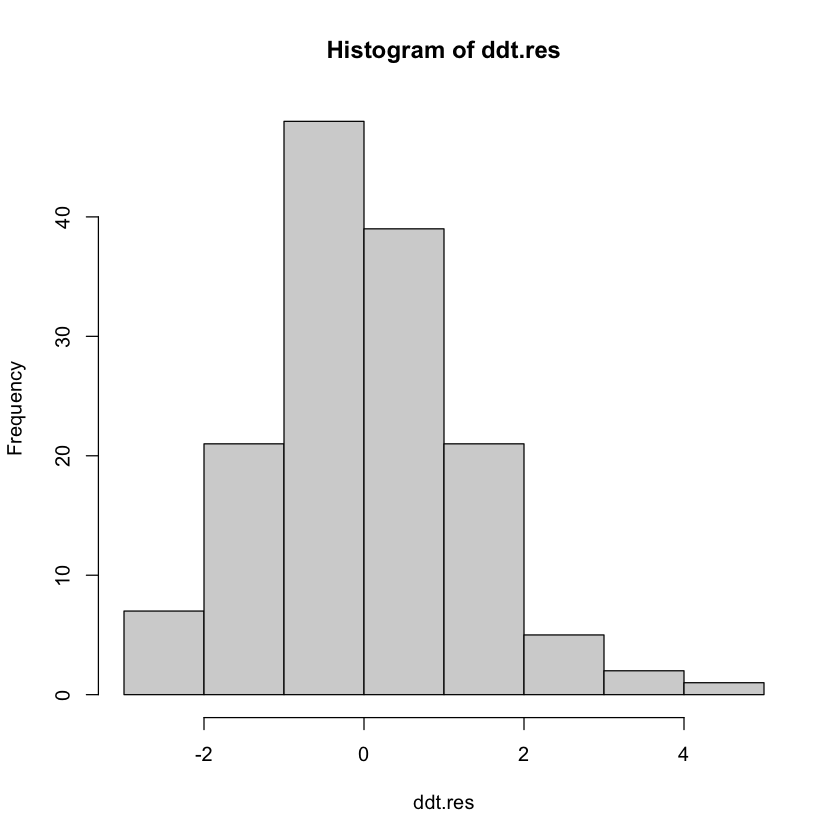

In [13]:
ddt.res = residuals(ddt.lm) 
ddt.fit = fitted(ddt.lm) 
plot(ddt.res~ddt.fit)
hist(ddt.res)

The residual plot does seem to suggest that the residuals have mean 0 and constant variance.
The histogram does indicate close to normal distribution of residuals.

### Question 1 part b)


Call:
lm(formula = LN.DDT ~ LENGTH.SQRT)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5803 -0.7942 -0.1029  0.7923  4.7491 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -6.9352     1.1895  -5.830 3.57e-08 ***
LENGTH.SQRT   1.3549     0.1818   7.453 8.20e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.228 on 142 degrees of freedom
Multiple R-squared:  0.2812,	Adjusted R-squared:  0.2761 
F-statistic: 55.54 on 1 and 142 DF,  p-value: 8.2e-12



Call:
lm(formula = LN.DDT ~ LENGTH.SQR)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4849 -0.7855 -0.1141  0.8033  4.7832 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6735866  0.3841761  -1.753   0.0817 .  
LENGTH.SQR   0.0013674  0.0001967   6.952 1.21e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.251 on 142 degrees of freedom
Multiple R-squared:  0.2539,	Adjusted R-squared:  0.2487 
F-statistic: 48.33 on 1 and 142 DF,  p-value: 1.206e-10



Call:
lm(formula = LN.DDT ~ LENGTH.CUBE)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6224 -0.8242 -0.0757  0.8442  4.8194 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.698e-02  2.967e-01   0.259    0.796    
LENGTH.CUBE 2.164e-05  3.297e-06   6.564 9.14e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.268 on 142 degrees of freedom
Multiple R-squared:  0.2328,	Adjusted R-squared:  0.2274 
F-statistic: 43.09 on 1 and 142 DF,  p-value: 9.136e-10


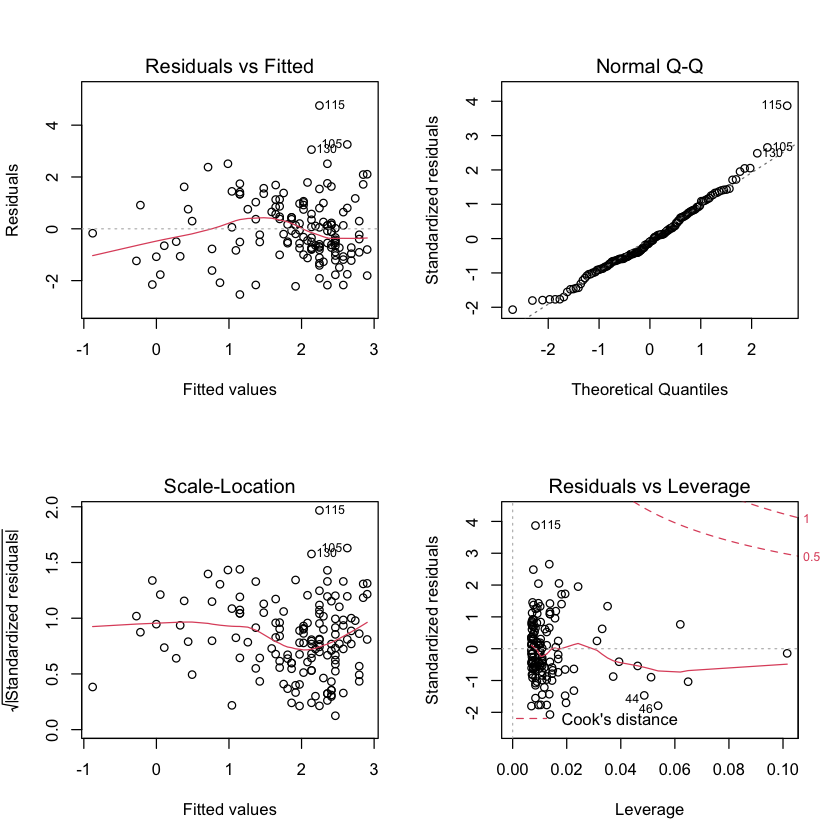

In [14]:
#Creating a plot command on the ddt.lm object:
par(mfrow=c(2,2))
plot(ddt.lm)

#Transforming Length Variable:
LENGTH.SQRT = LENGTH^0.5 
ddt.lm1=lm(LN.DDT~LENGTH.SQRT) 
summary(ddt.lm1) #R-Square = 0.2812
LENGTH.SQR = LENGTH^2
ddt.lm2=lm(LN.DDT~LENGTH.SQR)
summary(ddt.lm2) #R-square = 0.2539
LENGTH.CUBE = LENGTH^3
ddt.lm3=lm(LN.DDT~LENGTH.CUBE)
summary(ddt.lm3) #R-square = 0.2328

Looking at the top two charts, the residuals seem to display no clear trend, they show no clear change in variance, and they look approximately normal. So no other transformations are necessary.

There does not seem to be any significant improvement in the R-square fit after using any of these additional transformations.

### Question 1 part c)

In [15]:
#Hypothesis test: H0: ß_1= 0, H1: ß_1 /= 0 
t=(0.1096-0)/0.0150 #=7.306667
p=2*pt(-t, df=142) #=1.810901e-11

#output the values so you can see them
t
p

[1] 7.306667

[1] 1.810901e-11

This value is also directly obtained from summary(ddt.lm).
Since the p value is extremely small, we can reject the null hypothesis at much less than 1% level. So we have a very strong evidence that the DDT concentration is related to fish length.

### Question 1 part d)

In [16]:
t=qt(0.025,df=142,lower.tail=FALSE) 
c(-2.7972-t*0.6503,-2.7972+t*0.6503)

[1] -4.08272 -1.51168

The 95% confidence interval for the intercept is given by: [-4.08272 -1.51168]

This confidence interval does not include 0.